In [1]:
import pandas as pd
import sqlalchemy as sql
import datetime
import pymysql

# read password and user to database
credentials_file = r'./credentials.pw'

credentials = pd.read_csv(credentials_file, header=0)
user = credentials['username'].values[0]
pw = credentials['password'].values[0]

host="twofast-rpi3-0"  # your host
user='reader' # username
passwd='heiko'  # password
db="NG_twofast_DB" # name of the database
connect_string = 'mysql+pymysql://%(user)s:%(pw)s@%(host)s:3306/%(db)s'% {"user": user, "pw": pw, "host": host, "db": db}
sql_engine = sql.create_engine(connect_string)



def truncateTable(tableName):
    sql_engine.execute("TRUNCATE TABLE %(tbl)s" % {"tbl": tableName})
    

def switchDLLstateInControlTable(sql_engine):
    timeExecuted = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    sql_engine.execute("UPDATE microwave_generator_control SET DLL_on = 1 - DLL_on, time = '%(timeExecuted)s' WHERE id = 1" % {"timeExecuted": timeExecuted})

def initializeDLLstateValue(sql_engine):
    sql_engine.execute("INSERT INTO microwave_generator_control (DLL_on) VALUES (0)")
    
def getState(sql_engine):
    """
    Reads the last 10 entries of the two temperatures and returns it in a dataframe
    """
    query = "SELECT * FROM microwave_generator_state ORDER BY id DESC LIMIT 10"
    df = pd.read_sql(query, sql_engine)

    # columns: time (timestamp), relais_5 (tinyint), relais_24 (tinyint), rf_status (tinyint), id (primary key)
    return df

FileNotFoundError: [Errno 2] File b'./credentials.pw' does not exist: b'./credentials.pw'

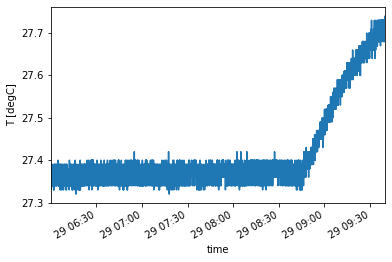

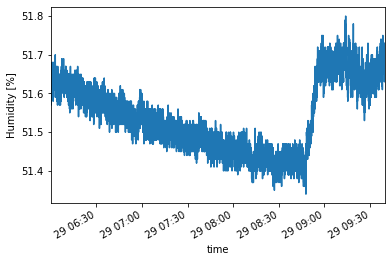

In [15]:
import pandas as pd
import sqlalchemy as sql
import datetime
import pymysql
import matplotlib.pyplot as plt
%matplotlib inline

host="twofast-rpi3-0"  # your host
user='reader' # username
pw='heiko'  # password
db="NG_twofast_DB" # name of the database
connect_string = 'mysql+pymysql://%(user)s:%(pw)s@%(host)s:3306/%(db)s'% {"user": user, "pw": pw, "host": host, "db": db}
sql_engine = sql.create_engine(connect_string)

def insert_to_db(sql_engine, temp, humid):
    sql_engine.execute("INSERT INTO temp_humid_sensor (temp, humid) VALUES (%(temp)s, %(humid)s)" % {"temp":temp, "humid":humid})

def read_db(sql_engine, table):
    """
    Reads the last 10 entries of the two temperatures and returns it in a dataframe
    """
    query = "SELECT * FROM %(tableName)s ORDER BY id" % {"tableName": table}
    df = pd.read_sql(query, sql_engine)
    return df

data = read_db(sql_engine, 'temp_humid_sensor')
data.set_index('time', inplace=True)
data = data['2019-08-29 06:00:00':]
temp = data['temp']
temp = temp[ temp >0 ]
temp.plot()
plt.ylabel('T [degC]')
plt.show()

humid = data['humid']
humid = humid[ humid >0 ]
humid.plot()
plt.ylabel('Humidity [%]')
plt.show()

In [6]:
data['2019-08-29 08:30:00'::100] 

,id,temp,humid
time,,,
2019-08-29 08:30:00.578,62167,27.36,51.39
2019-08-29 08:31:52.585,62267,27.39,51.42
2019-08-29 08:33:48.608,62367,27.39,51.46
2019-08-29 08:35:44.611,62467,27.39,51.42
2019-08-29 08:37:36.590,62567,27.38,51.42
2019-08-29 08:39:32.581,62667,27.36,51.45
2019-08-29 08:41:28.569,62767,27.34,51.45
2019-08-29 08:43:20.553,62867,27.38,51.42
2019-08-29 08:45:16.605,62967,27.38,51.47
